In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_clahe(clip_limit, tile_size):
    """Applies CLAHE with the given parameters and updates the image."""
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=(tile_size, tile_size))
    enhanced_image = clahe.apply(image)
    cv2.imshow("CLAHE Enhanced Image", cv2.resize(enhanced_image, (400, 400)))

# Load thermal image (grayscale)
image = cv2.imread("image.png", cv2.IMREAD_GRAYSCALE)

# Create a window
cv2.namedWindow("CLAHE Enhanced Image", cv2.WINDOW_NORMAL)
cv2.resizeWindow("CLAHE Enhanced Image", 800, 600)

def on_trackbar(val):
    clip_limit = cv2.getTrackbarPos("Clip Limit", "CLAHE Enhanced Image") / 10.0
    tile_size = cv2.getTrackbarPos("Tile Size", "CLAHE Enhanced Image")
    tile_size = max(1, tile_size)  # Ensure tile size is at least 1
    apply_clahe(clip_limit, tile_size)

# Create trackbars
cv2.createTrackbar("Clip Limit", "CLAHE Enhanced Image", 20, 50, on_trackbar)  # Default 2.0, range 0.1-5.0
cv2.createTrackbar("Tile Size", "CLAHE Enhanced Image", 8, 32, on_trackbar)  # Default 8, range 1-32

# Initial call to display the image
on_trackbar(0)

cv2.waitKey(0)
cv2.destroyAllWindows()


QObject::moveToThread: Current thread (0x8137700) is not the object's thread (0x92009c0).
Cannot move to target thread (0x8137700)

QObject::moveToThread: Current thread (0x8137700) is not the object's thread (0x92009c0).
Cannot move to target thread (0x8137700)

QObject::moveToThread: Current thread (0x8137700) is not the object's thread (0x92009c0).
Cannot move to target thread (0x8137700)

QObject::moveToThread: Current thread (0x8137700) is not the object's thread (0x92009c0).
Cannot move to target thread (0x8137700)

QObject::moveToThread: Current thread (0x8137700) is not the object's thread (0x92009c0).
Cannot move to target thread (0x8137700)

QObject::moveToThread: Current thread (0x8137700) is not the object's thread (0x92009c0).
Cannot move to target thread (0x8137700)

QObject::moveToThread: Current thread (0x8137700) is not the object's thread (0x92009c0).
Cannot move to target thread (0x8137700)

QObject::moveToThread: Current thread (0x8137700) is not the object's thread

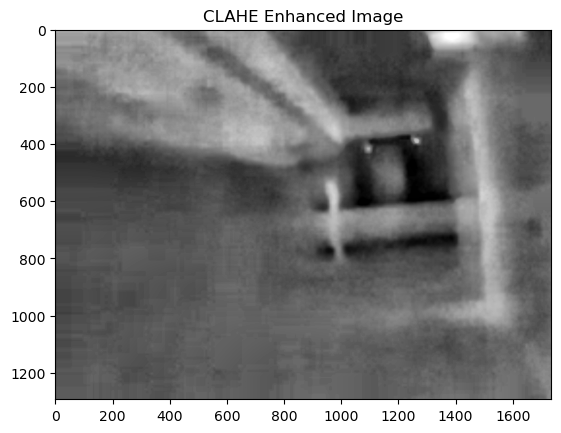

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load thermal image (grayscale)
image = cv2.imread("image.png", cv2.IMREAD_GRAYSCALE)

# Apply CLAHE for local contrast enhancement
clahe = cv2.createCLAHE(clipLimit=4.0, tileGridSize=(8, 8))
image_clahe = clahe.apply(image)

# Display enhanced image
plt.imshow(image_clahe, cmap='gray')
plt.title('CLAHE Enhanced Image')
plt.show()


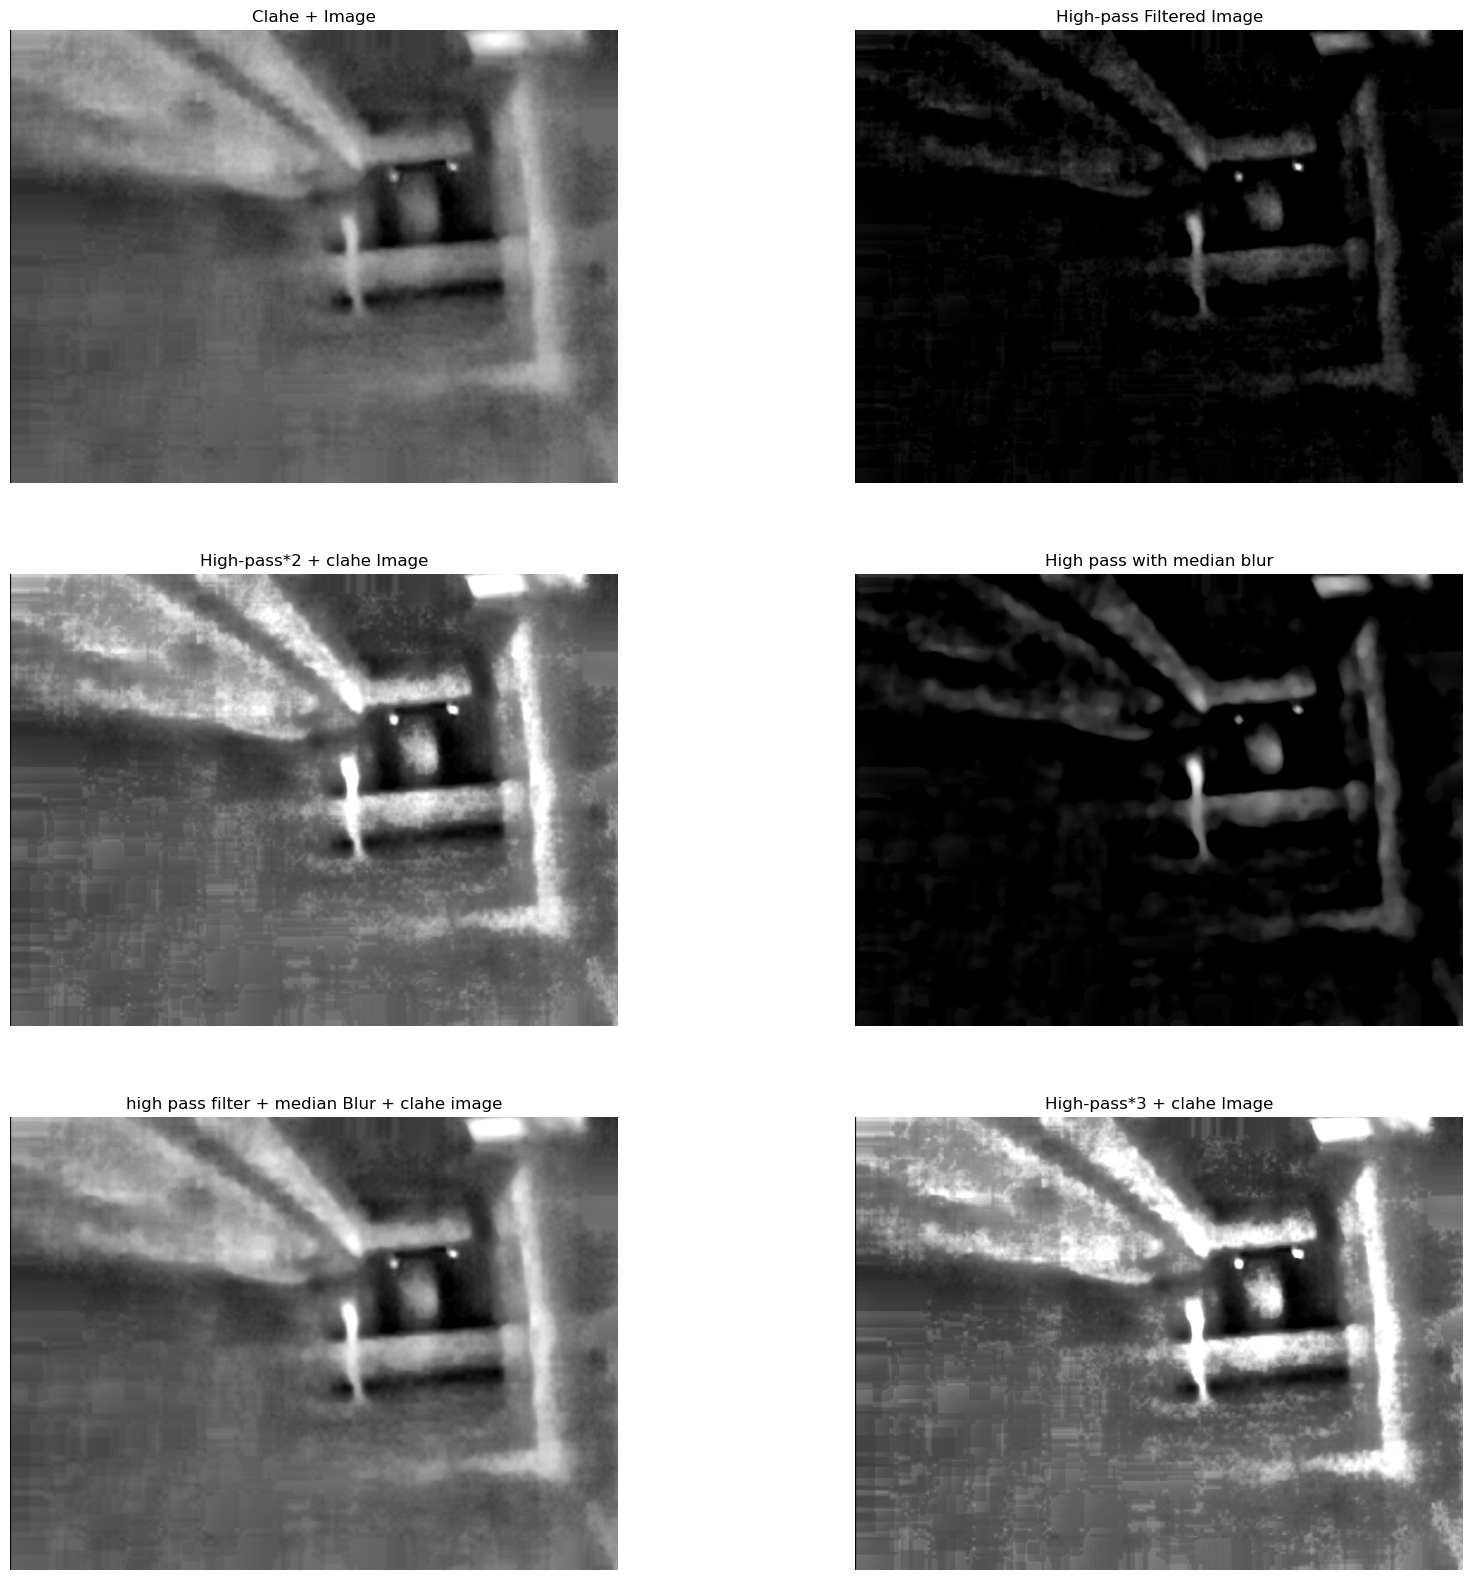

In [7]:
original = image
image = image_clahe
equalized = cv2.equalizeHist(image)

# Apply a Gaussian blur (low-pass filter)
low_pass_image = cv2.GaussianBlur(image, (299, 299), 0)
low_pass_image_original = cv2.GaussianBlur(original, (299, 299), 0)

# Subtract the low-pass filtered image from the original to get the high-pass filtered image
high_pass_image = cv2.subtract(image, low_pass_image)
high_pass_image_original = cv2.subtract(original, low_pass_image)


_, thresholded_img = cv2.threshold(high_pass_image, 30, 40, cv2.THRESH_BINARY)

end = cv2.add(image, high_pass_image)
end = cv2.add(end, high_pass_image)
end = cv2.add(end, high_pass_image) # 3 * high pass filter + image

end2 = cv2.add(image, high_pass_image)
end2 = cv2.add(end2, high_pass_image) # 2 * high pass filter + image

end3 = cv2.add(image, high_pass_image)
end3 = cv2.add(end3, high_pass_image)
end3 = cv2.add(end3, high_pass_image) # 3 * high pass filter + image


high = cv2.medianBlur(high_pass_image, 25) # high pass filter + median Blur
high2 = cv2.add(high_pass_image, high_pass_image)
high3 = cv2.add(high, high_pass_image)

final = cv2.GaussianBlur(end, (45, 45), 0) # 3 * high pass filter + image + Gaussian Blur
final2 = cv2.add(image, high) # high pass filter + median Blur + clahe image

_, mask = cv2.threshold(image, 20, 255, cv2.THRESH_BINARY)
inpainted_image = cv2.inpaint(end, mask, inpaintRadius=3, flags=cv2.INPAINT_TELEA)

denoised_image = cv2.medianBlur(end, 25)

# Display the original, low-pass, and high-pass filtered images using Matplotlib
fig, axes = plt.subplots(3, 2, figsize=(20, 20))

# Original Image
axes[0][0].imshow(image, cmap='gray')
axes[0][0].set_title('Clahe + Image')
axes[0][0].axis('off')

# Low-pass filtered Image
# High-pass filtered Image
axes[0][1].imshow(high_pass_image, cmap='gray')
axes[0][1].set_title('High-pass Filtered Image')
axes[0][1].axis('off')

# High-pass + Image
# axes[1][0].imshow(end, cmap='gray')
# axes[1][0].set_title('High-pass*3 + equalized Image')
# axes[1][0].axis('off')

# axes[1][0].imshow(high_pass_image_original, cmap='gray')
# axes[1][0].set_title('High pass + original image')
# axes[1][0].axis('off')

axes[1][0].imshow(end2, cmap='gray')
axes[1][0].set_title('High-pass*2 + clahe Image')
axes[1][0].axis('off')

axes[1][1].imshow(high, cmap='gray')
axes[1][1].set_title('High pass with median blur')
axes[1][1].axis('off')

axes[2][0].imshow(final2, cmap='gray')
axes[2][0].set_title('high pass filter + median Blur + clahe image')
axes[2][0].axis('off')

axes[2][1].imshow(end3, cmap='gray')
axes[2][1].set_title('High-pass*3 + clahe Image')
axes[2][1].axis('off')

plt.show()


In [8]:
import cv2
import numpy as np

def on_trackbar(val):
    pass

def main():
    # Load an image
    img = final2
    
    if img is None:
        print("Error: Could not load image.")
        return
    
    # Resize the image to a smaller size
    img = cv2.resize(img, (800, 600))
    
    # Create a window
    cv2.namedWindow('Canny Edge Detector', cv2.WINDOW_NORMAL)
    cv2.resizeWindow('Canny Edge Detector', 800, 600)
    
    # Create trackbars for lower and upper thresholds
    cv2.createTrackbar('Lower Threshold', 'Canny Edge Detector', 50, 255, on_trackbar)
    cv2.createTrackbar('Upper Threshold', 'Canny Edge Detector', 150, 255, on_trackbar)
    
    while True:
        # Get the current trackbar positions
        lower = cv2.getTrackbarPos('Lower Threshold', 'Canny Edge Detector')
        upper = cv2.getTrackbarPos('Upper Threshold', 'Canny Edge Detector')
        
        # Apply Canny edge detection
        edges = cv2.Canny(img, lower, upper)
        
        # Show the result
        cv2.imshow('Canny Edge Detector', edges)
        
        # Press 'q' to exit
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    
    cv2.destroyAllWindows()

if __name__ == "__main__":
    main()


QObject::moveToThread: Current thread (0x8137700) is not the object's thread (0x92009c0).
Cannot move to target thread (0x8137700)

QObject::moveToThread: Current thread (0x8137700) is not the object's thread (0x92009c0).
Cannot move to target thread (0x8137700)

QObject::moveToThread: Current thread (0x8137700) is not the object's thread (0x92009c0).
Cannot move to target thread (0x8137700)

QObject::moveToThread: Current thread (0x8137700) is not the object's thread (0x92009c0).
Cannot move to target thread (0x8137700)

QObject::moveToThread: Current thread (0x8137700) is not the object's thread (0x92009c0).
Cannot move to target thread (0x8137700)

QObject::moveToThread: Current thread (0x8137700) is not the object's thread (0x92009c0).
Cannot move to target thread (0x8137700)

QObject::moveToThread: Current thread (0x8137700) is not the object's thread (0x92009c0).
Cannot move to target thread (0x8137700)

QObject::moveToThread: Current thread (0x8137700) is not the object's thread

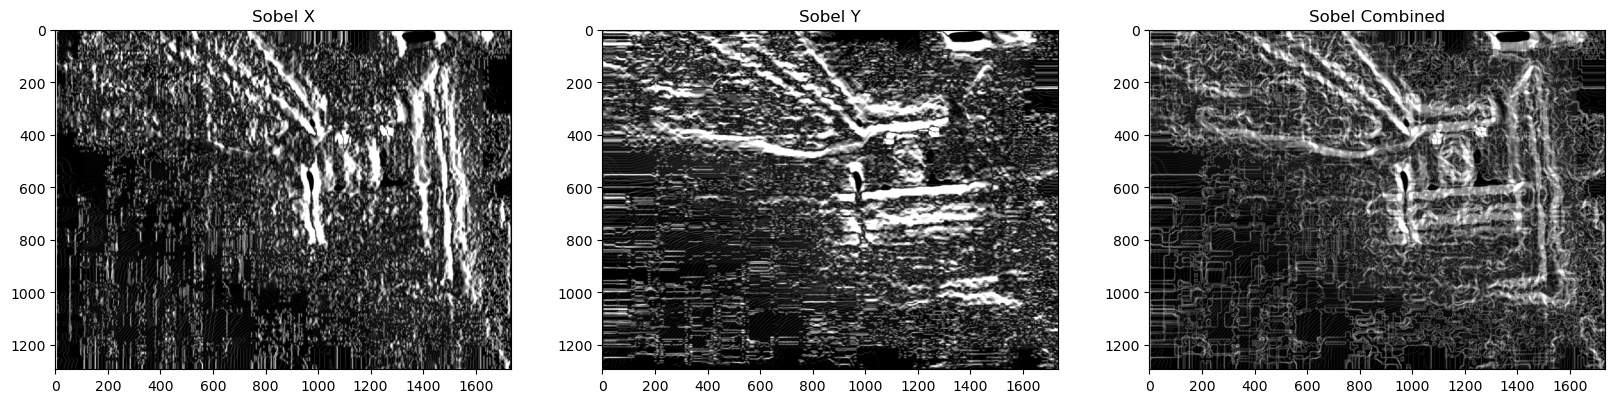

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image = final2
blurred = cv2.GaussianBlur(image, (7,7), 0)

# Apply Sobel filters
sobel_x = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=5)  # X-direction
sobel_y = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=5)  # Y-direction

# Convert to absolute values and normalize
sobel_x = cv2.convertScaleAbs(sobel_x)
sobel_y = cv2.convertScaleAbs(sobel_y)

# Combine both gradients
sobel_combined = cv2.addWeighted(sobel_x, 0.5, sobel_y, 0.5, 0)

# Display results
plt.figure(figsize=(20, 10))
plt.subplot(1, 3, 1), plt.imshow(sobel_x, cmap='gray'), plt.title('Sobel X')
plt.subplot(1, 3, 2), plt.imshow(sobel_y, cmap='gray'), plt.title('Sobel Y')
plt.subplot(1, 3, 3), plt.imshow(sobel_combined, cmap='gray'), plt.title('Sobel Combined')
plt.show()


[]

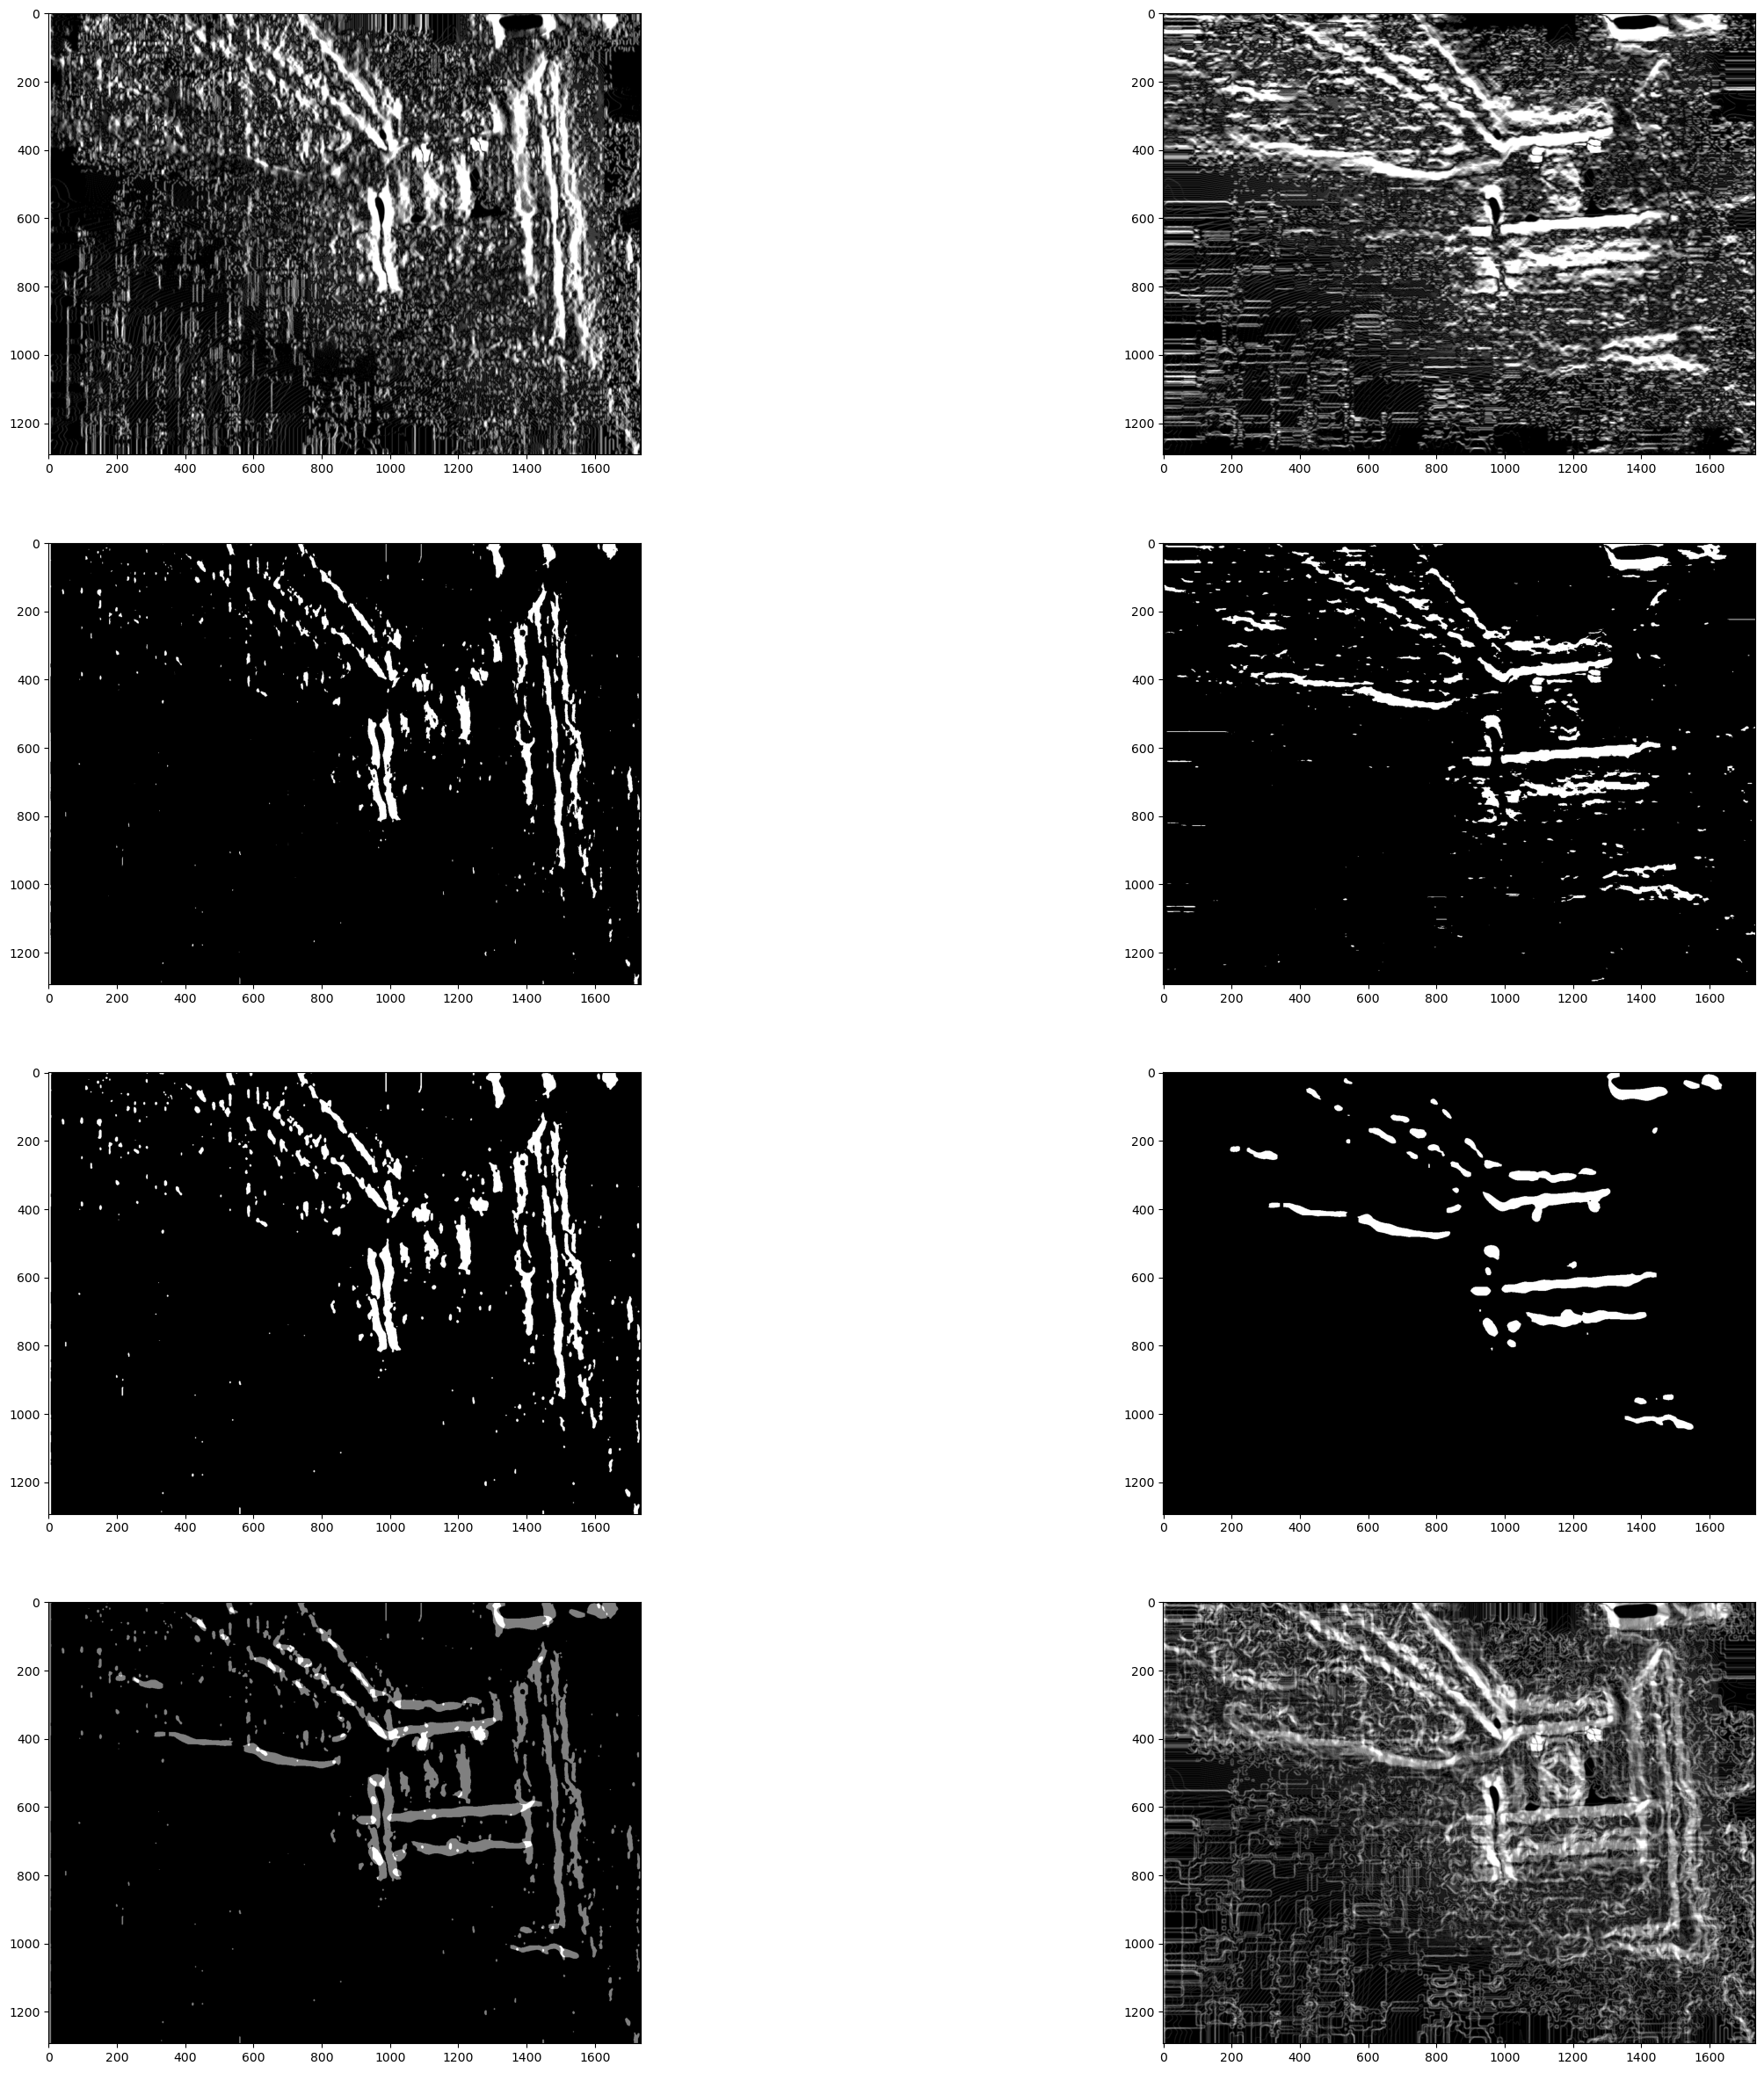

In [10]:
# ret, th = cv2.threshold(sobel_x, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

_, thresh_x = cv2.threshold(sobel_x, 245, 255, cv2.THRESH_BINARY)
_, thresh_y = cv2.threshold(sobel_y, 245, 255, cv2.THRESH_BINARY)

# Remove lines or noise (you can adjust the kernel size)
# kernel = np.ones((5,5), np.uint8)
# processed_image = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

# eroded = cv2.erode(thresh, (15,15), iterations=1)

kernel = np.ones((3,3),np.uint8)

dilated_x = cv2.dilate(thresh_x, kernel, iterations = 1)

blured_x = cv2.medianBlur(dilated_x, 5)
blured_y = cv2.medianBlur(thresh_y, 25)

sobel_combined_blured = cv2.addWeighted(blured_x, 0.5, blured_y, 0.5, 0)

plt.figure(figsize=(30,30))

plt.subplot(4,2,1)
plt.imshow(sobel_x, cmap='gray')

plt.subplot(4,2,2)
plt.imshow(sobel_y, cmap='gray')

plt.subplot(4,2,3)
plt.imshow(thresh_x, cmap='gray')

plt.subplot(4,2,4)
plt.imshow(thresh_y, cmap='gray')

plt.subplot(4,2,5)
plt.imshow(blured_x, cmap='gray')

plt.subplot(4,2,6)
plt.imshow(blured_y, cmap='gray')

plt.subplot(4,2,7)
plt.imshow(sobel_combined_blured, cmap='gray')

plt.subplot(4,2,8)
plt.imshow(sobel_combined, cmap='gray')

plt.plot()

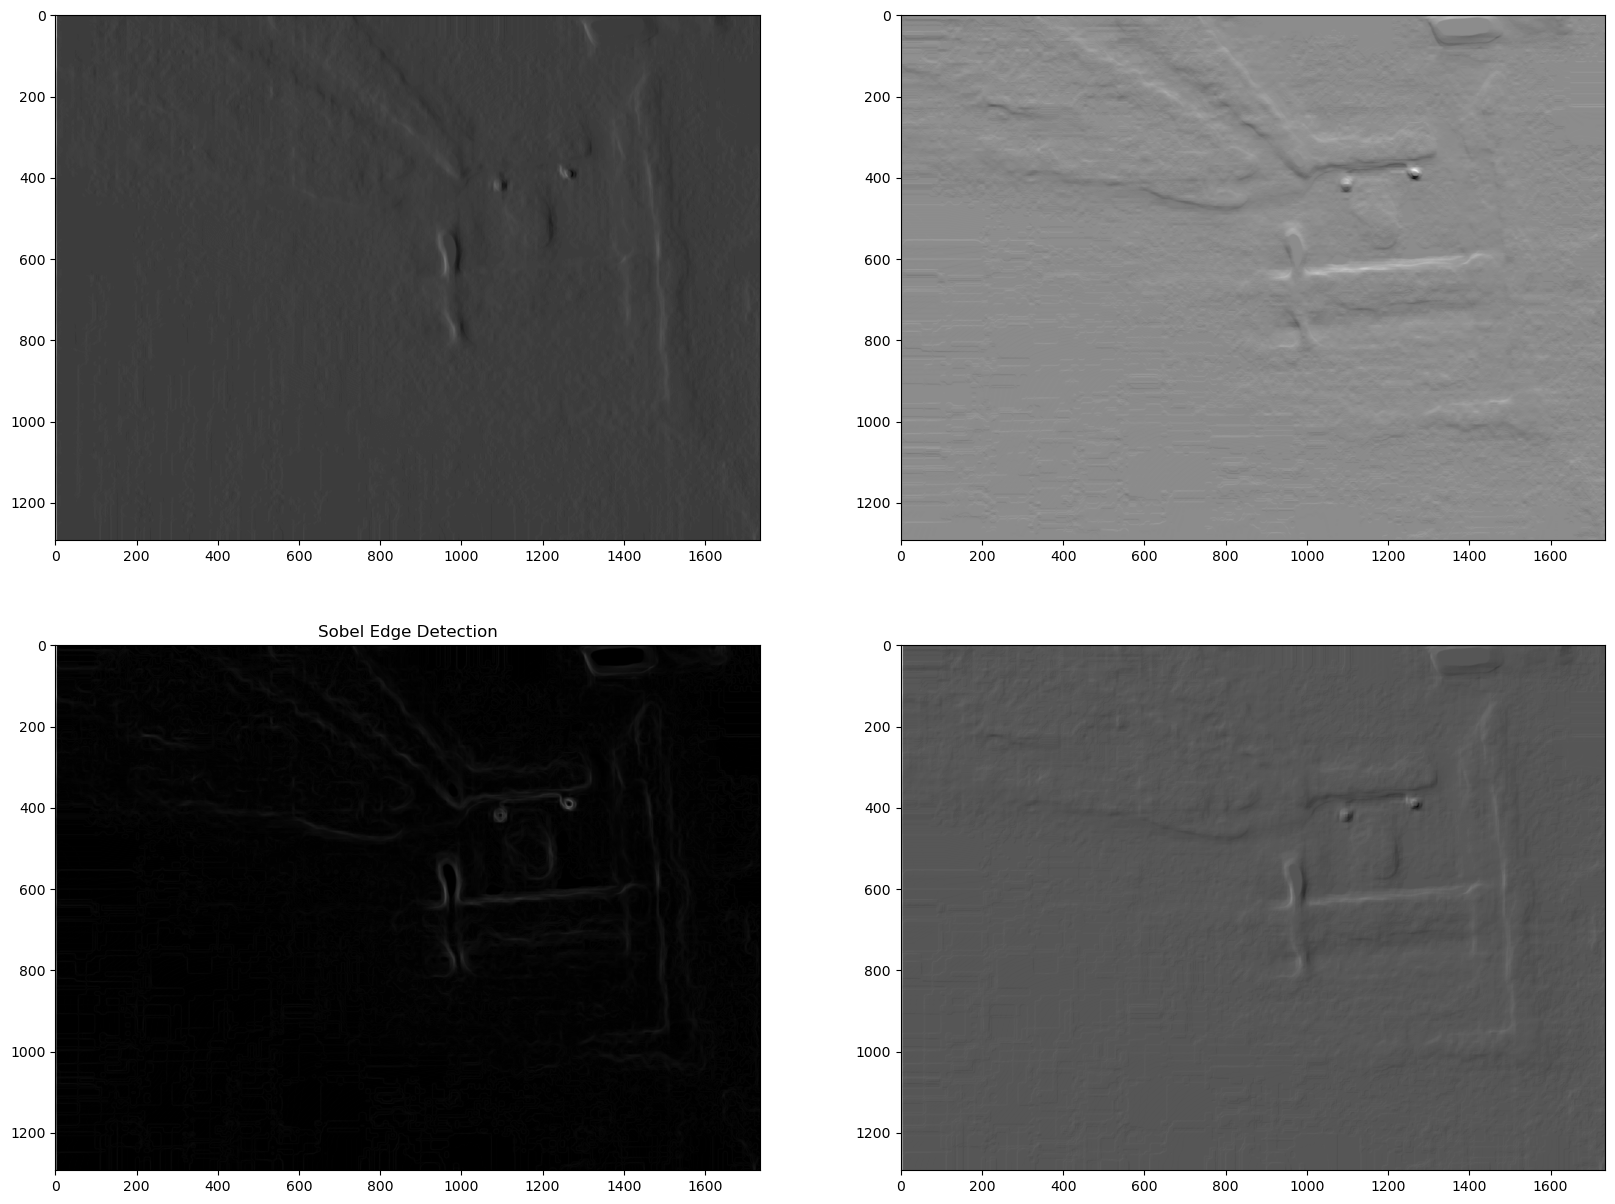

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load thermal image (grayscale)
image = final2
# image = cv2.imread("image.png", cv2.IMREAD_GRAYSCALE)

# Apply Sobel edge detection (both horizontal and vertical)
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)

edges_sobel = cv2.magnitude(sobel_x, sobel_y)

sobel_combined = cv2.addWeighted(sobel_x, 0.5, sobel_y, 0.5, 0)

# Display Sobel edges

plt.figure(figsize=(20,15))

plt.subplot(2,2,1)
plt.imshow(sobel_x, cmap='gray')

plt.subplot(2,2,2)
plt.imshow(sobel_y, cmap='gray')

plt.subplot(2,2,3)
plt.imshow(edges_sobel, cmap='gray')
plt.title('Sobel Edge Detection')

plt.subplot(2,2,4)
plt.imshow(sobel_combined, cmap='gray')

plt.show()
